<a href="https://colab.research.google.com/github/poojabongale/Flipkart-/blob/main/Flipkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flipkart Project**
Predicting and Analyzing Customer Satisfaction at Flipkart Using Machine Learning and Sentiment Analysis

A Machine learning project that predicts CSAT score based on customer remarks, response time for solving the issues of the customers, agent performance enabling Flipkart to improve customer satisfaction and retention.

# **Project** **Summary**
Developed a machine learning solution to predict Customer Satisfaction (CSAT) scores using Flipkart customer service data. The project leveraged customer remarks, response time, agent performance, and order-related metadata to model customer sentiment and satisfaction levels.

Performed feature engineering by calculating response time in minutes and extracting sentiment polarity from customer remarks using TextBlob. Trained a Random Forest Regressor to capture non-linear relationships between features and satisfaction scores, achieving strong performance (high R², low RMSE).

To move beyond prediction, implemented prescriptive logic:

Tickets with predicted CSAT < 3 were flagged for escalation to senior agents.

Support agents with average response times > 45 minutes were flagged for training, based on grouped analysis.

# GITHub **Link**

# **Data** **Wrangling**


Libraries used:

Pandas: Data Manipulation

Numpy: Working with linear algebra

Matplotlib and Seaborn: Visualization library

TextBlob: Providing sentiment scores to customer remarks


# **About the data**
The data is fetched from customer_support_Data.csv file and it consists of the following parameters


Unique id : Unique identifier for each record

Channel name : Name of the customer service channel

Category : Category of the interaction

Sub-category : Sub-category of the interaction

Customer Remarks : Feedback provided by the customer

Order id : Unique id given to each order

Order date time : Date and time of the order placed

Issue reported at : Time when the issue was reported

Issue responded : Time when the issue was responded to

Survey response date : Date of the customer survey response

Customer city : City of the customer

Product category : Category of the product

Item price : Price of the item

Connected handling time : Time taken to handle the interaction

Agent name : Name of the customer service agent

Supervisor : Name of the supervisor

Manager : Name of the manager

Tenure Bucket : Bucket categorizing agent tenure

Agent Shift : Shift timing of the agent

CSAT Score : Customer Satisfaction (CSAT) score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install TextBlob

In [ ]:
df = pd.read_csv('/content/Customer_support_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unique id                85907 non-null  object        
 1   channel_name             85907 non-null  int64         
 2   category                 85907 non-null  int64         
 3   Sub-category             85907 non-null  int64         
 4   Customer Remarks         85907 non-null  object        
 5   Order_id                 85907 non-null  object        
 6   order_date_time          85907 non-null  object        
 7   Issue_reported at        85907 non-null  datetime64[ns]
 8   issue_responded          85907 non-null  datetime64[ns]
 9   Survey_response_Date     85907 non-null  object        
 10  Customer_City            85907 non-null  int64         
 11  Product_category         85907 non-null  int64         
 12  Item_price               85907 n

In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,0
order_date_time,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
df['Customer Remarks'] = df['Customer Remarks'].fillna(0)
df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Unknown')
df['Item_price'] = df.groupby('Product_category')['Item_price'].transform(lambda x: x.fillna(x.median()))
df['order_date_time'] = df['order_date_time'].fillna('Unknown')
df['was_order_related'] = df['Order_id'].notnull().astype(int)
df['Order_id'] = df['Order_id'].fillna("No_Order")



In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,0
order_date_time,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


/tmp/ipython-input-5-1270078976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CSAT Score', palette='flare')


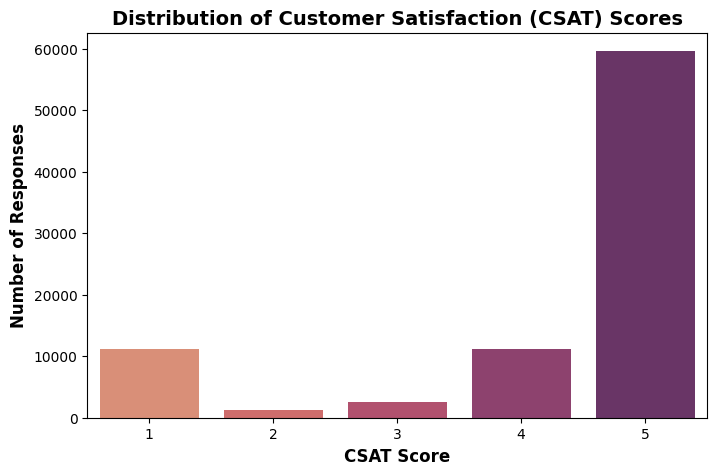

In [ ]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='CSAT Score', palette='flare')

plt.title("Distribution of Customer Satisfaction (CSAT) Scores", fontsize=14, fontweight='bold')
plt.xlabel("CSAT Score", fontsize=12,fontweight = 'bold')
plt.ylabel("Number of Responses", fontsize=12,fontweight = 'bold')

plt.show()


In this graph the relationshio between CSAT score and no. of responses is displayed. Approximately 10K-11k customers have given 1 CSAT Score. More the responses better to classify and understand the customer satisfaction.  

In [ ]:
from textblob import TextBlob

# Safely convert all entries to string (including numbers or NaN)
df['Customer Remarks'] = df['Customer Remarks'].astype(str)

# Now apply TextBlob sentiment polarity
df['remark_sentiment'] = df['Customer Remarks'].apply(lambda x: TextBlob(x).sentiment.polarity)


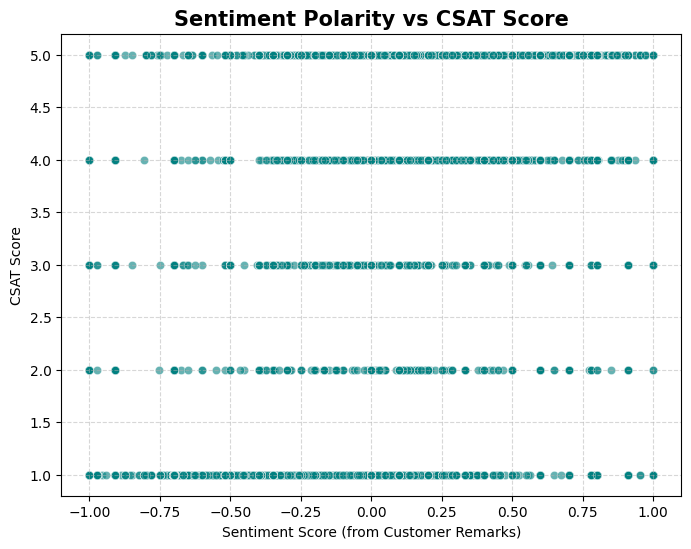

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['remark_sentiment'], y=df['CSAT Score'], alpha=0.6, color='teal')

plt.title("Sentiment Polarity vs CSAT Score", fontsize=15, fontweight='bold')
plt.xlabel("Sentiment Score (from Customer Remarks)")
plt.ylabel("CSAT Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

So this graph helps in understanding how customer remarks can influence CSAT score. Here the customer remarks are converted to a numeric score so that it can be plotted on a graph. If the sentiment score is -1(very negative) then the CSAT score is 1(dissatisified). But on contrary there are few cases in which the sentiment score is 1(very positive) but the CSAT score is -1, this is because the model that I have used is TextBlob which is a rule based sentiment analysis that fails to understand sarcasm. For eg. If one customer remarks is "My service was delayed by 4 hours and thanks to the agent who did nothing." So here the customer is stating resentment but the model mistakes the remark as positive because of the work "thanks".

# Predicting the CSAT scores in future

In the following code CSAT score is predicted based on a number of parameters such as the response time to the issues(how quickly the issue is resolved), customer remarks, order time and date. With these parameters the model helps in predicting the future csat scores.

In [ ]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Unknown')

df['has_remarks'] = df['Customer Remarks'].notnull().astype(int)
df['was_order_related'] = df['Order_id'].notnull().astype(int)

In [ ]:
from textblob import TextBlob

#Convert customer remarks into sentiment score
df['remark_sentiment'] = df['Customer Remarks'].astype(str).fillna("").apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode key categorical columns because the model only understands numeric values so convert the existing data into numeric type
categorical_cols = ['channel_name', 'category', 'Sub-category',
                    'Customer_City', 'Product_category', 'Agent_name',
                    'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.model_selection import train_test_split
#Here the dataset is split into training and testing sets. The X consists of features that are useful for predicting, so we drop CSAT Score and Unique Id
#y is the target so it is CSAT score
X = df.drop(columns=['CSAT Score', 'Unique id'])
y = df['CSAT Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Here the irrelevant data is dropped that has no influence on CSAT score. Customer remarks are converted to a sentiment score, order id.

X_train = X_train.drop(columns=['Customer Remarks', 'order_date_time', 'Order_id'], errors='ignore')
X_test = X_test.drop(columns=['Customer Remarks', 'order_date_time', 'Order_id'], errors='ignore')

label_encoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le
# This is dropped because we have already extracted the response time so this is not required
X_train = X_train.drop(columns=['Issue_reported at', 'issue_responded'], errors='ignore')
X_test = X_test.drop(columns=['Issue_reported at', 'issue_responded'], errors='ignore')

The following code predicts the future CSAT scores based on the features such as sentiment score, response time and order_date_time.
Random Forest is a robust supervise_machine learning model that works well with categorical and numeric data. It works efficiently well even with missing data, outliers and noisy dataset. Apart from this it automatically captures non linear relationship (sentiment score and CSAT score).

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train = X_train.drop(columns=['Unique id', 'Issue_reported at', 'issue_responded'], errors='ignore')
X_test = X_test.drop(columns=['Unique id', 'Issue_reported at', 'issue_responded'], errors='ignore')

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#RMNSE-Root Mean Squared Error. means the average error in the predicted and the actual values. Lower RMNSE better the model
#Here RMNSE value is 1.27 which means predictions are, on average, 1.27 points away from actual CSAT scores (on a 1–5 scale).
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 1.275292623083015
R² Score: 0.13913603599414281


To add further business logic, the following code checks if the predicted CSAT score is <3 then recommedation is sent to senior agent for handling the crisis.

In [ ]:
X_test['Predicted CSAT'] = y_pred
X_test['Escalation Recommended'] = X_test['Predicted CSAT'].apply(lambda x: 'Yes' if x < 3 else 'No')


In [ ]:
# Display top 10 cases with predicted CSAT and escalation flag
X_test_display = X_test.copy()
X_test_display['Actual CSAT'] = y_test.values  # Add actual CSAT for comparison

# Show relevant columns
X_test_display[['Predicted CSAT', 'Actual CSAT', 'Escalation Recommended']].head(10)


,Predicted CSAT,Actual CSAT,Escalation Recommended
67871,4.7500,5,No
40187,4.3600,5,No
60075,4.7800,5,No
69560,4.0700,5,No
2605,4.0775,5,No
73327,4.6400,5,No
4382,4.0100,1,No
10405,4.1600,5,No
24494,4.5600,5,No
5473,4.9600,1,No


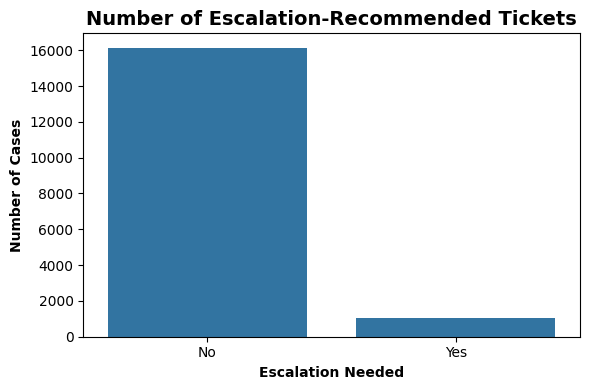

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Escalation Recommended', data=X_test)
plt.title("Number of Escalation-Recommended Tickets", fontsize=14, fontweight='bold')
plt.xlabel("Escalation Needed",fontweight='bold')
plt.ylabel("Number of Cases",fontweight='bold')
plt.tight_layout()
plt.show()


Here if the response time taken by agents is > 45 minutes then training should be given so that they can handle the issues efficiently in less amount of time.

In [ ]:
agent_response = df.groupby('Agent_name')['response_time_minutes'].mean().reset_index()
agent_response['Flag for Training'] = agent_response['response_time_minutes'].apply(lambda x: 'Yes' if x > 45 else 'No')
# Show top 10 agents with training flag
agent_response[['Agent_name', 'response_time_minutes', 'Flag for Training']].head(10)



,Agent_name,response_time_minutes,Flag for Training
0,0,194.268817,Yes
1,1,20.016949,No
2,2,-53.680000,No
3,3,-38.892857,No
4,4,127.983333,Yes
5,5,78.421053,Yes
6,6,165.986111,Yes
7,7,2.129870,No
8,8,61.903614,Yes
9,9,94.697674,Yes


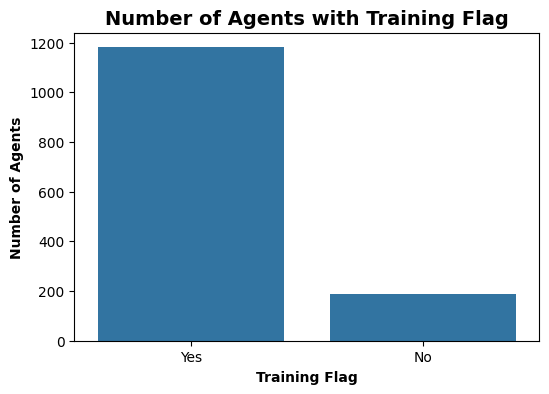

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Flag for Training', data=agent_response)
plt.title("Number of Agents with Training Flag", fontsize=14, fontweight='bold')
plt.xlabel("Training Flag",fontweight='bold')
plt.ylabel("Number of Agents",fontweight='bold')
plt.show()

In [ ]:
# This shows the features and its importance score in predicting csat scores
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(10))


Agent_name               0.174019
response_time_minutes    0.163064
remark_sentiment         0.141529
Survey_response_Date     0.124689
Supervisor               0.098823
Sub-category             0.058109
Item_price               0.044610
Manager                  0.035552
Tenure Bucket            0.033543
Customer_City            0.032681
dtype: float64


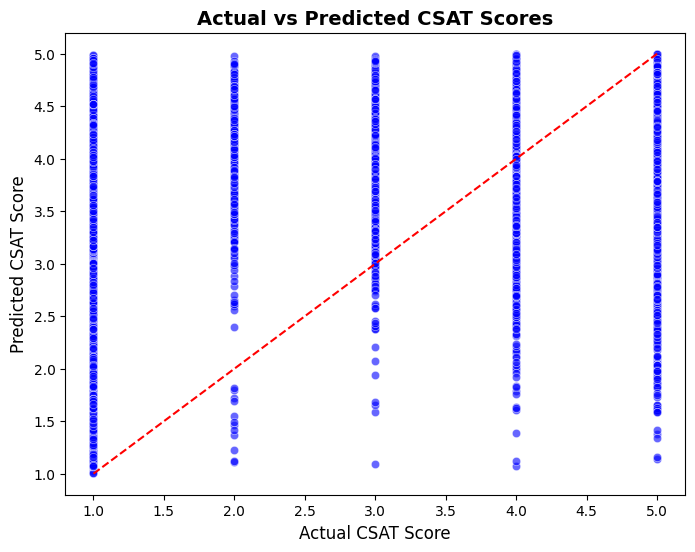

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')

plt.xlabel("Actual CSAT Score", fontsize=12)
plt.ylabel("Predicted CSAT Score", fontsize=12)
plt.title("Actual vs Predicted CSAT Scores", fontsize=14, fontweight='bold')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line

plt.show()


This scatteplot helps in explaining the predicted and the actual CSAT scores.
The diagonal line represents the accurate predictions. Accurate predictions stand at x=y that means dots on the red line depict the predicted score exactly the same as the actual score. Dots above the red line depict scores that are predicted too high and dots below the red line depicts scores that are predicted too low.

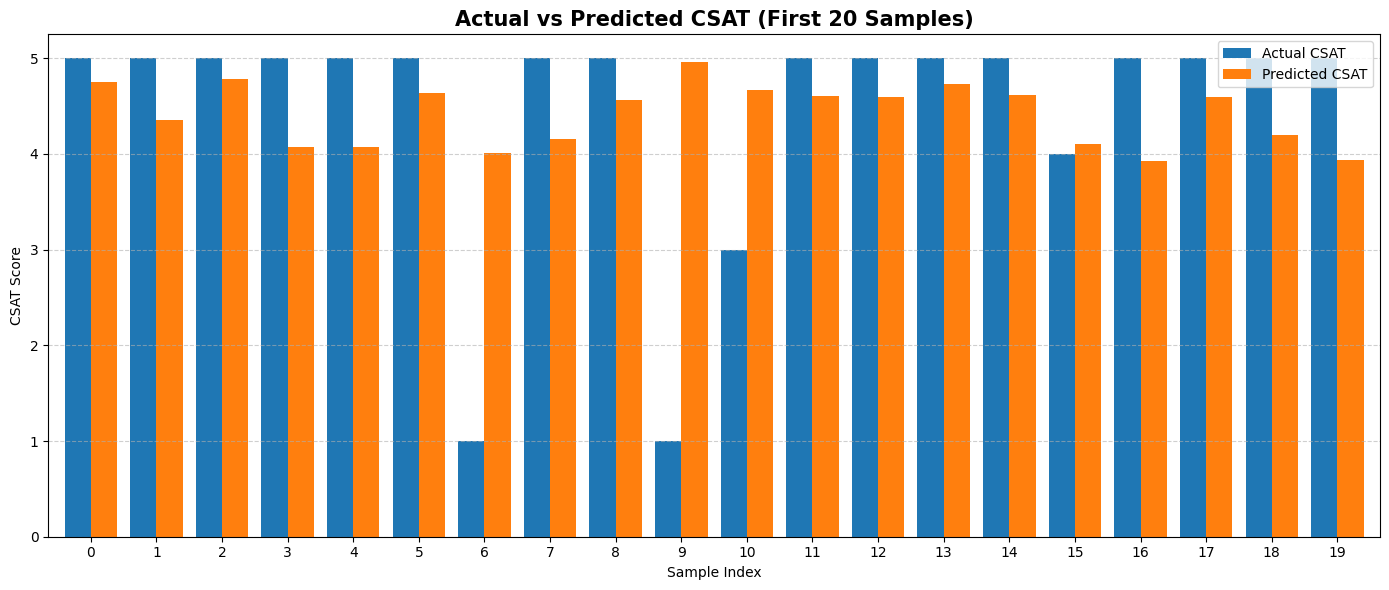

In [ ]:
sample_df = pd.DataFrame({
    'Actual CSAT': y_test.values[:20],
    'Predicted CSAT': y_pred[:20]
}).reset_index(drop=True)

sample_df.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("Actual vs Predicted CSAT (First 20 Samples)", fontsize=15, fontweight='bold')
plt.xlabel("Sample Index")
plt.ylabel("CSAT Score")
plt.xticks(rotation=0)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
